In [1]:
import numpy as np
import matplotlib.pyplot as plt

from abtem.ionization import SubshellTransitions, TransitionPotential, EELSDetector
from abtem import SMatrix, Potential, GridScan

from ase import units
from ase.io import read

from typing import Union

import numpy as np
from numba import jit,vectorize,guvectorize,float64

Z = 8 # atomic number
n = 1 # principal quantum number
l = 0 # azimuthal quantum number
xc = 'PBE' # exchange-correlation functional
gpts = 256
extent = 5
energy = 3e5
order = 2
# transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=1)
# max_epsilon = energy - transitions.ionization_energy
sampling = extent/gpts


Transitions: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


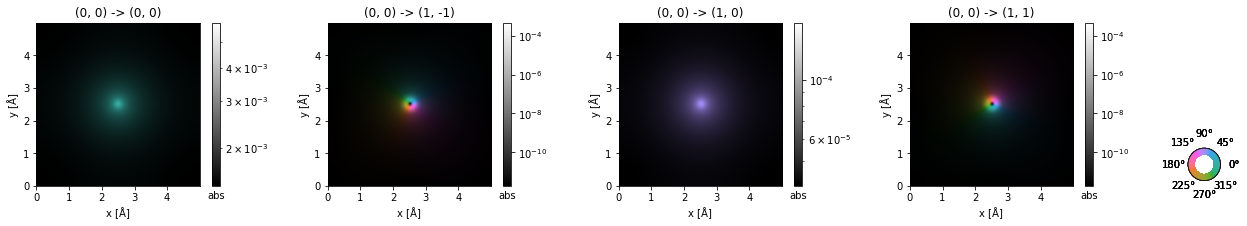

In [4]:
transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=100)
atomic_transition_potentials = transitions.get_transition_potentials(extent = 5,
                                                                sampling= 0.01,
                                                                energy = 3e5)
fig, axes = plt.subplots(1,4, figsize = (20,3))

for ax, atomic_transition_potential in zip(axes, atomic_transition_potentials):
    # print(str(atomic_transition_potential))
    atomic_transition_potential.show(ax = ax, title = str(atomic_transition_potential),cbar=True)
# fig.tight_layout()

In [3]:
z = np.exp(1j * np.linspace(-np.pi, np.pi, 128))

In [4]:
from abtem.visualize.utils import domain_coloring
domain_coloring(z)

array([[0.96779756, 0.44127456, 0.53581032],
       [0.96818468, 0.44414561, 0.51021089],
       [0.96857721, 0.44703487, 0.48246467],
       [0.96897719, 0.44995678, 0.45194337],
       [0.96938681, 0.45292644, 0.41773965],
       [0.96980848, 0.45595993, 0.37844907],
       [0.97024484, 0.45907466, 0.3316704 ],
       [0.        , 0.        , 0.        ],
       [0.96884176, 0.46710871, 0.1965442 ],
       [0.94224851, 0.48653608, 0.19626783],
       [0.91832382, 0.50264695, 0.19602752],
       [0.        , 0.        , 0.        ],
       [0.87655318, 0.52811271, 0.19562666],
       [0.85800246, 0.53846615, 0.19545622],
       [0.84065561, 0.54767006, 0.19530101],
       [0.82430944, 0.55594782, 0.19515845],
       [0.80879541, 0.56347001, 0.19502643],
       [0.79397144, 0.57036951, 0.19490325],
       [0.77971575, 0.57675174, 0.19478753],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.73935448, 0.59357056, 0.19447428],
       [0.

In [5]:
phase = (np.angle(z) + np.pi) / (2 * np.pi)

In [6]:
phase

array([0.        , 0.00787402, 0.01574803, 0.02362205, 0.03149606,
       0.03937008, 0.04724409, 0.05511811, 0.06299213, 0.07086614,
       0.07874016, 0.08661417, 0.09448819, 0.1023622 , 0.11023622,
       0.11811024, 0.12598425, 0.13385827, 0.14173228, 0.1496063 ,
       0.15748031, 0.16535433, 0.17322835, 0.18110236, 0.18897638,
       0.19685039, 0.20472441, 0.21259843, 0.22047244, 0.22834646,
       0.23622047, 0.24409449, 0.2519685 , 0.25984252, 0.26771654,
       0.27559055, 0.28346457, 0.29133858, 0.2992126 , 0.30708661,
       0.31496063, 0.32283465, 0.33070866, 0.33858268, 0.34645669,
       0.35433071, 0.36220472, 0.37007874, 0.37795276, 0.38582677,
       0.39370079, 0.4015748 , 0.40944882, 0.41732283, 0.42519685,
       0.43307087, 0.44094488, 0.4488189 , 0.45669291, 0.46456693,
       0.47244094, 0.48031496, 0.48818898, 0.49606299, 0.50393701,
       0.51181102, 0.51968504, 0.52755906, 0.53543307, 0.54330709,
       0.5511811 , 0.55905512, 0.56692913, 0.57480315, 0.58267

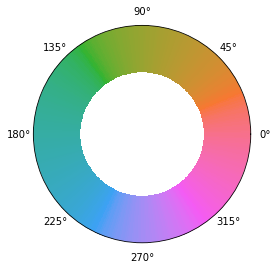

In [24]:
from matplotlib import colors
from abtem.visualize.colors import hsluv
cmap=colors.ListedColormap(hsluv)
azimuths = np.arange(0, 361, 1)
zeniths = np.arange(40, 70, 1)
values = azimuths * np.ones((30, 361))
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.set_yticklabels([])
ax.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap=cmap,shading='auto')

# ax.set_yticks([])

In [8]:
zeniths.shape

(30,)

In [9]:
values = azimuths * np.ones((30, 361))
values.shape

(30, 361)

In [10]:
import cmocean
import matplotlib.pyplot as plt
import numpy as np

azimuths = np.arange(0, 361, 1)
zeniths = np.arange(40, 70, 1)
values = azimuths * np.ones((30, 361))
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap=cmocean.cm.phase)
ax.set_yticks([])
plt.show()

ModuleNotFoundError: No module named 'cmocean'

/tmp/ipykernel_232944/642583067.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels([0, 50, 30, 'foo', 'bar', 'baz'])


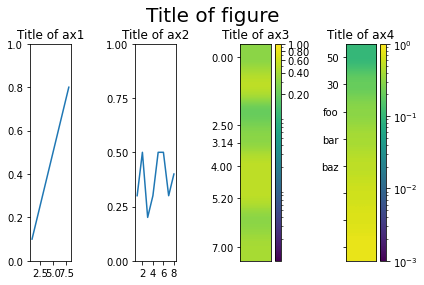

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator

s = {'t': 1,
     'x': [1, 2, 3, 4, 5, 6, 7, 8],
     'T': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
     'D': [0.3, 0.5, 0.2, 0.3, 0.5, 0.5, 0.3, 0.4]}

width = 40

tot = np.repeat(s['D'],width).reshape(len(s['D']), width)
tot2 = np.repeat(s['T'],width).reshape(len(s['D']), width)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

fig.suptitle('Title of figure', fontsize=20)

# Line plots
ax1.set_title('Title of ax1')
ax1.plot(s['x'], s['T'])
ax1.set_ylim(0,1)

ax2.set_title('Title of ax2')
ax2.plot(s['x'], s['D'])
# Set locations of ticks on y-axis (at every multiple of 0.25)
ax2.yaxis.set_major_locator(MultipleLocator(0.25))
# Set locations of ticks on x-axis (at every multiple of 2)
ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.set_ylim(0,1)

ax3.set_title('Title of ax3')
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im3 = ax3.imshow(tot, norm=LogNorm(vmin=0.001, vmax=1), aspect='auto')
# Create divider for existing axes instance
divider3 = make_axes_locatable(ax3)
# Append axes to the right of ax3, with 20% width of ax3
cax3 = divider3.append_axes("right", size="20%", pad=0.05)
# Create colorbar in the appended axes
# Tick locations can be set with the kwarg `ticks`
# and the format of the ticklabels with kwarg `format`
cbar3 = plt.colorbar(im3, cax=cax3, ticks=MultipleLocator(0.2), format="%.2f")
# Remove xticks from ax3
ax3.xaxis.set_visible(False)
# Manually set ticklocations
ax3.set_yticks([0.0, 2.5, 3.14, 4.0, 5.2, 7.0])

ax4.set_title('Title of ax4')
im4 = ax4.imshow(tot2, norm=LogNorm(vmin=0.001, vmax=1), aspect='auto')
divider4 = make_axes_locatable(ax4)
cax4 = divider4.append_axes("right", size="20%", pad=0.05)
cbar4 = plt.colorbar(im4, cax=cax4)
ax4.xaxis.set_visible(False)
# Manually set ticklabels (not ticklocations, they remain unchanged)
ax4.set_yticklabels([0, 50, 30, 'foo', 'bar', 'baz'])

plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()